# Resumen

# Introducción

El Banco de Archivos Digitales de Artes en Colombia – BADAC – cuenta con acervos documentales como catálogos razonados, fondos documentales y colecciones. Los catálogos razonados son el registro digital total o parcial de las obras de un artista, mientras que los fondos documentales corresponden a los archivos digitalizados, acumulada a lo largo de los años por artistas, instituciones, creadores e investigadores de la historia del arte de Colombia. Por su parte, las colecciones son agrupaciones fácticas de documentación, ordenada por su tipología documental, temática, época, etc.

En el ámbito de BADAC, que alberga una amplia gama de documentación y obras de arte de Colombia,
se presenta la necesidad de un motor de búsqueda que pueda filtrar obras según su paleta de colores.
Para que este motor funcione de manera efectiva, es crucial asignar y determinar las paletas de colores
que mejor representan cada obra de arte. Este paso es fundamental para garantizar resultados de
búsqueda precisos y relevantes.

El objetivo de este proyecto es desarrollar e implementar un motor de búsqueda para obras de arte del Banco de Archivos Digitales
de Artes de Colombia que permita localizar y agrupar obras de arte con base en criterios cromáticos
predefinidos.

La cuantización de colores es una tarea común en el procesamiento de imágenes, esto se debe a que el
número de colores de las imágenes puede llegar a ser muy alto, dificultando así su almacenamiento y su
análisis. Para solucionar este problema se han desarrollado diversos algoritmos que permiten reducir
el número de colores de la imagen, iniciando en 1980 con el desarrollo del algoritmo Median-cut.
Para nuestro poblema partícular, de extraer una paleta de colores representativa de una imagen,
podemos reusar los algoritmos desarrollados sobre cuantización de colores para generar el número
de colores deseado en nuestra paleta, y luego sencillamente se podría ordenar la paleta de colores por
la frecuencia de píxeles en la imagen para cada uno de los grupos de colores.
La cuantización de colores consiste en 2 fases principales:
1. Creación de la paleta de colores: Selección de un pequeño set de colores extraídos de la imagen
original.
2. Mapeo de píxeles: Consiste en el mapeo de cada píxel de la imagen a un color de la paleta de colores.

El principal objetivo de la cuantización de colores es reducir el número de colores de una imagen
generando la mínima distorción posible.
Como se puede observar en la **Figura 1**, la cuantización de colores puede servirnos para reducir en gran
medida el número de bits de la imagen sin perdida sustancial de información, por lo menos para la
percepción visual humana. Por ejemplo, las diferencias de la imagen en 64 colores son poco percebtibles
si se le compara con la imagen original de 183.525 colores.
Para solucionar el problema planteado en nuestro proyecto, haremos uso de distintas técnicas de cuan-
tización de colores, y escogeremos la técnica que mejor resultados arroje según la valoración cualitativa
de nuestro cliente, y tendremos en cuenta el costo computacional de cada método para evaluar su
viabilidad práctica.

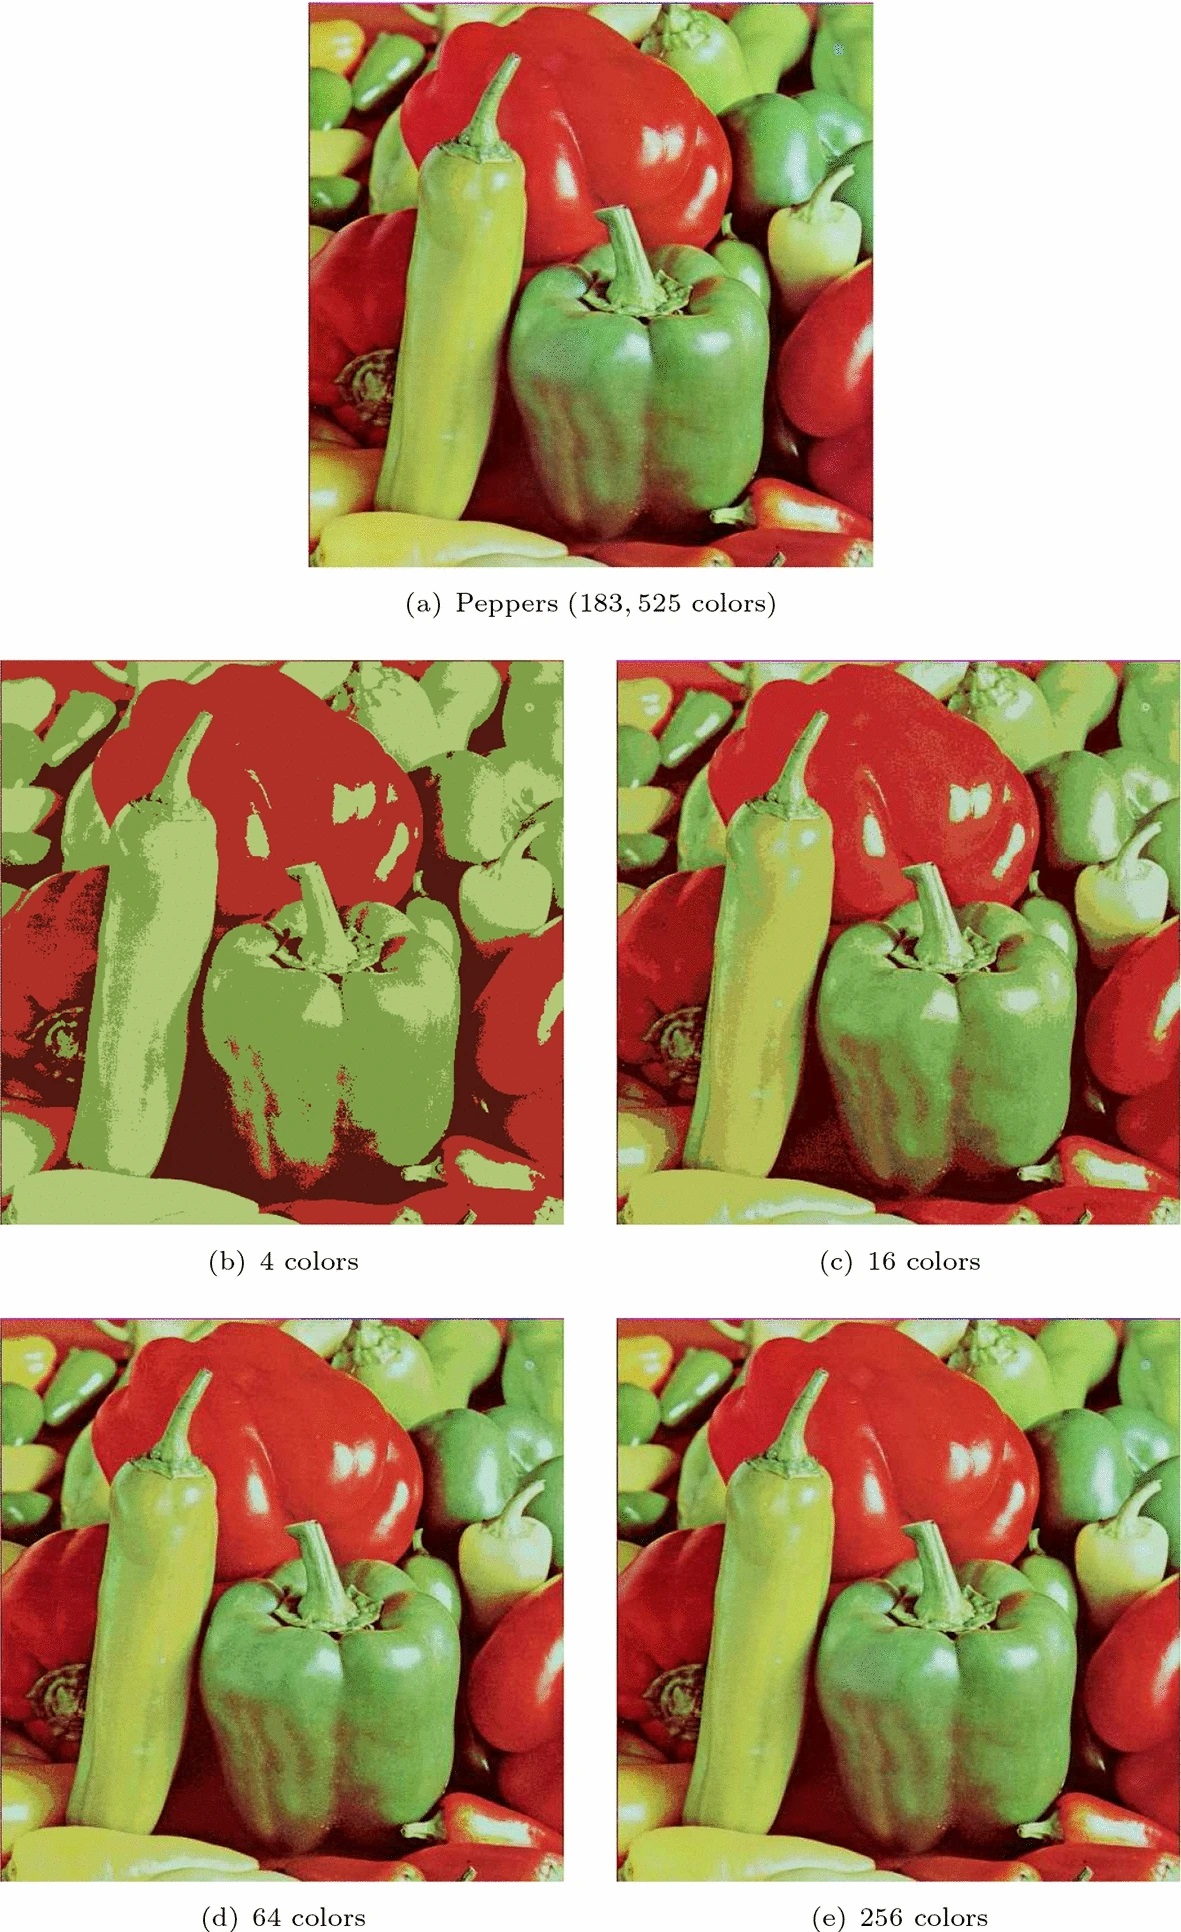

In [6]:
from IPython.display import Image, display

display(Image(filename='./imagenes_paper/Imagen_cuantizada.jpg', width=500))

**Figura 1** Imagen cuantizada con el algoritmo Median Cut tomada de (Celebi, M.E, 2023)

# Estado del arte

Aunque nuestro problema se relaciona con la cuantización de color, los objetivos de nuestro proyecto divergen en cuanto a que la paleta de colores que buscamos no necesariamente aquella que minimiza la pérdida de información de la imagen original sino aquella que cualitativamente represente de mejor manera la imagen. Adicionalmente, la paleta de colores objetivo consiste de únicamente 6 colores mientras que la mayoría de algoritmos de cuantización de color fueron pensados inicialmente para más colores (usualmente 32, 64 o 256). Es por estas razones que se tomaron distintos algoritmos de cuantización de color para evaluar sus resultados en el problema específico planteado.

## Median cut

Este algoritmo es una técnica jerarquíca divisional que consiste en tomar la imagen e irla dividiendo en grupos hasta conformar el número de grupos deseado. Más a detalle, consiste en coger todos los píxeles de la imágen y ordenarlos por el valor del canal de
color con mayor rango de la imágen, esta operación sería una aproximación de encontrar el canal que presenta mayor varianza dentro del grupo. Es decir, si en la imagen original el canal de color de mayor rango
es el azul, entonces se ordenarán todos los píxeles según su valor para el cana azul. Luego se dividen
los píxeles en dos grupos por su mediana. Para conseguir el número deseado de colores se escoge el grupo que presente mayor rango en alguno de sus canales, se vuelve a
ordenar los píxeles del grupo por el canal de mayor rango y se realiza la división en el punto mediano.
Para definir el color representativo de cada grupo, se toma el promedio del color de cada uno de los
píxeles del grupo.

## Pairwise Nearest Neighbors (PNN)

Esta técnica es del tipo jerarquíca aglomerativa. Es decir, que de manera contraria a Median-cut, cada píxel inicia en su propio grupo, y estos se van combinando hasta alcanzar el número de grupos deseados. El algoritmo consiste en que se comparan todos los pares posibles de combinaciones, y por cada combinación se calcula su impacto en el MSE de la siguiente manera $d_{a,b} = {n_a n_b \over n_a + n_b} * ||c_a - c_b||^2$, en donde $a,b$ corresponden a los índices de los grupos a evaluar, $n$ coresponde al tamaño del grupo (número de píxeles), y $c$ al color representante del grupo (centroide, media del grupo). Con base en esta distancia, se escogen para combinar el par de grupos que tengan el menor impacto en el MSE. Este proceso se realiza iterativamente hasta alcanzar los grupos propuestos.

## KMeans

Esta técnica de clusterización nos permite elegir el número de colores que queremos hagan parte de
nuestra paleta de colores. Como queremos obtener una clusterización por color, representamos cada
imágen como una lista de elementos donde cada elemento es representado por 3 dimensiones, una por
cada canal de color.
Luego se realiza una operación iterativa hasta convergencia en donde se va reduciendo la distancia
entre cada uno de los valores originales de la imagen y los k centroides definidos.
Como resultado de este algoritmo obtendríamos los k centroides, que representarían los colores de
nuestra paleta de colores.

# Método

Esta sección se compone de los etapas de procesamiento, y evaluación llevadas a cabo para crear y comparar distintos métodos de creación de la paleta de colores en una colección de imágenes de la artista Beatriz Gonzáles facilitada por BADAC que consta de 1238 imágenes.

## Técnicas de preprocesamiento

Teniendo en cuenta que se busca crear una paleta de colores representativa de la imagen, se plantea el uso de algunas técnicas de preprocesamiento de imágenes con el objetivo de reducir posible ruido en las imágenes de la colección y homogeneizar los colores de la imagen para facilitar la tarea de los algoritmos. Adicionalmente, algunas de las transformaciones son imperativas para la ejecución de algunos de los algoritmos, para reducir los tiempos de cómputo y mejorar la viabilidad práctica de las soluciones implementadas.

**Filtro Promedio**.
En nuestros experimentos se evaluó el uso de un filtro promedio con un tamaño de kernel de 9X9, con el fin de suavizar la imágen y facilitar la segmentación de la imágen por color.

**Bit-cutting**. Esta técnica se extrajo de la literatura, en la que se hace uso de un recorte de bits para reducir en una primera instancia el número de colores presentes en la imágen. En nuestros experimentos, se uso esta técnica para reducir los colores de 256 a 32.

**Resize**. En busca de mejorar la eficiencia en el proceso de creación de paletas de color, se usó un reescalamiento de las imágenes para reducir el número de píxeles de la imagen. Para el algoritmo PNN, esta técnica fue imprescindible para reducir los tiempos de cómputo con el hardware disponible, utilizando imágenes de un máximo de 40.000 píxeles en total.

## Detalles técnicos de las implementaciones

**Median-cut**. Se encontró empirícamente que para mejorar la eficiencia del algoritmo era necesario que la imagen no superara el millón de píxeles. Adicionalmente, se encontró que la división del algoritmo por el punto mediano podía fallar. Se evidenció que la división por el punto mediano podía ocasionar en algunos casos, grupos con 0 píxeles. Por esta razón, fue necesario implementar reintentos de división por el segundo canal con mayor rango, luego por el segundo grupo, hasta encontrar una dvisión que no generar grupos vacíos.

**PNN**. La implementación de este algoritmo presentó importantes retos debido a la cantidad de operaciones realizadas por el algoritmo, traducidas en un alto tiempo de procesamiento por imagen. Este comportamiento se debe principalmente a dos razones: (1) que el algoritmo inicia con cada uno de los píxeles de su imagen en su propio grupo, por lo que deben realizarse un mínimo de $n-k$ combinaciones dónde $n$ es el número de píxeles de la imagen y $k$ es el número de grupos objetivo, y (2) para encontrar qué par de grupos deben combinarse, se deben evaluar todas las posibles combinaciones de los mismos.

En nuestra implementación, se decidió restringir el número de píxeles de las imágenes a un máximo de 40.000 píxeles, y se decicidió inicializar el algoritmo no con un píxel por grupo sino con 350 grupos. Para conformar estos 350 grupos iniciales, primero se definieron los centroides y posteriormente se asignó cada uno de los píxeles a su centroide más cercano, definiendo cercanía como su distancia euclideana. Para definir los 350 centroides se organizaron los píxeles de la imagen de acuerdo a la media de los 3 canales de colores, y se generaron particiones uniformes buscando cubrir todo el espacio de color utilizado por la imagen.


## Propuesta propia. Cuantización de color con una red neuronal


# Resultados


A continuación se muestran 5 imágenes aleatorias para las cuales se pueden ver los 11 métodos distintos utilizados para la creación de paletas de color. Para todos los casos la paleta de colores se ordenó según la proporción de píxeles de cada uno de los grupos segmentados de mayor a menor.

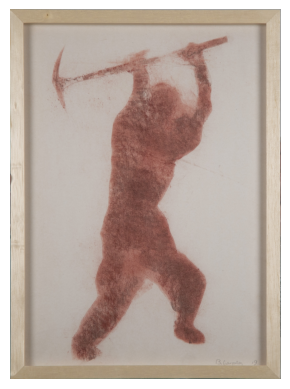

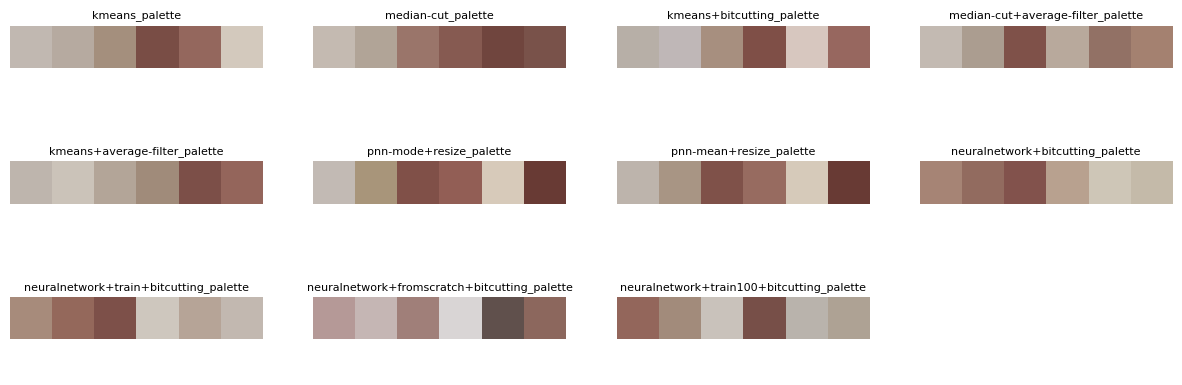

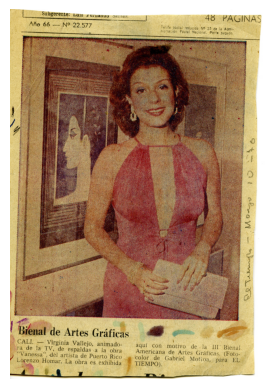

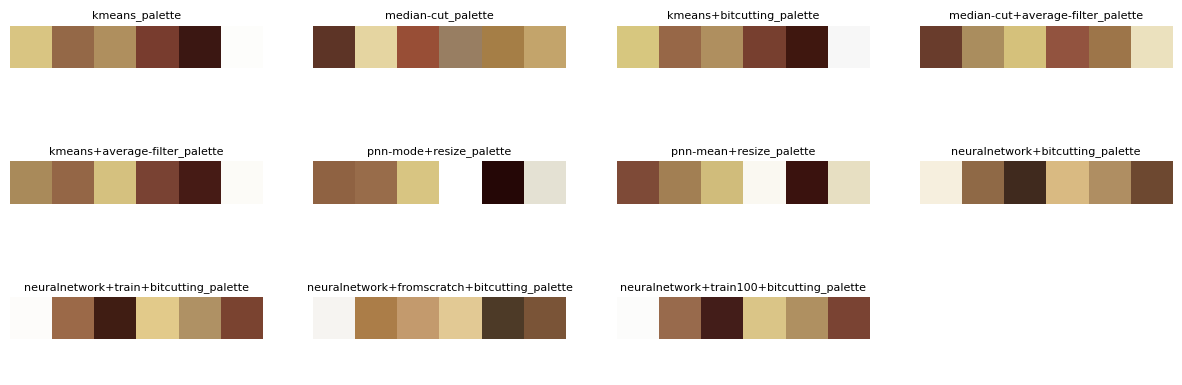

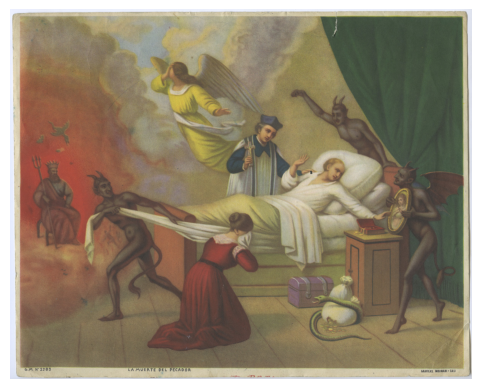

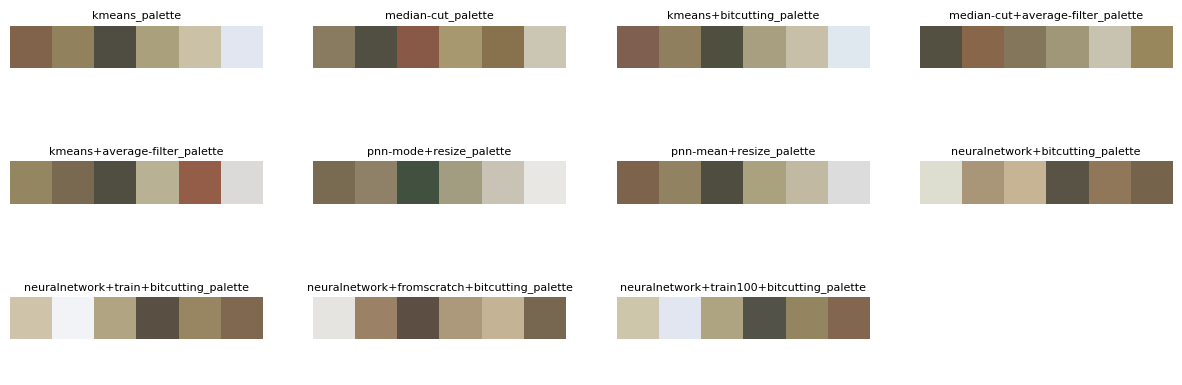

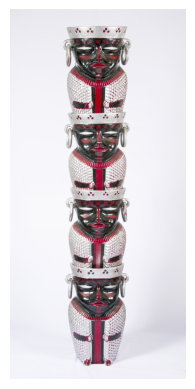

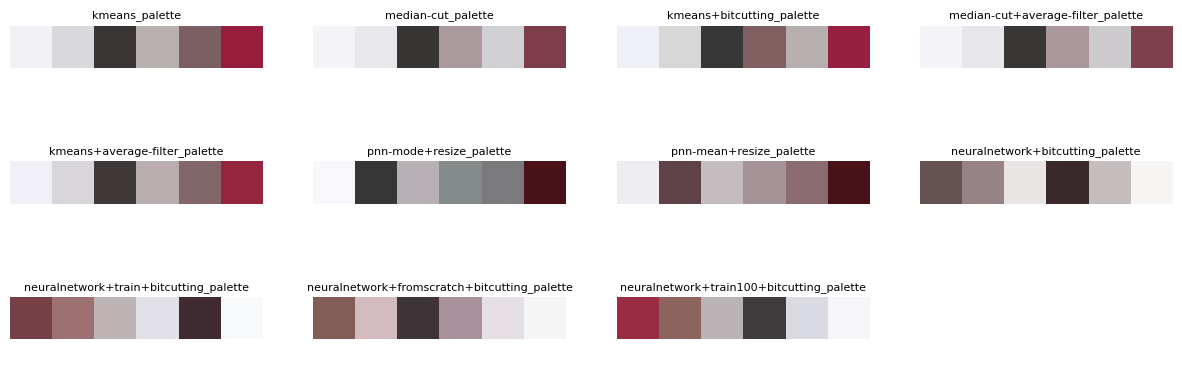

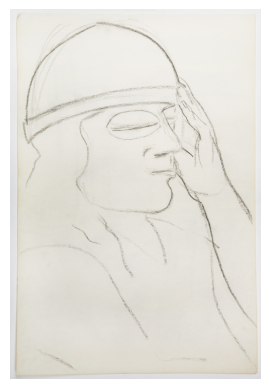

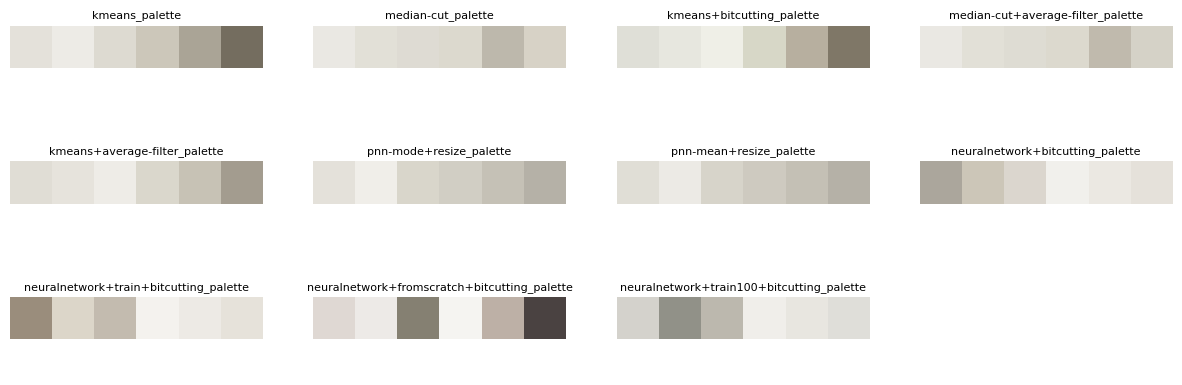

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from palette_creator import compare_palettes
import pandas as pd
from pathlib import Path

PATH_IMAGES_FOLDER = Path('data/beatriz_gonzalez')
db = pd.read_csv(Path("beatriz_gonzalez.csv"))

methods = [method for method in db.keys() if '_palette' in method]
sample = db.sample(5)
palettes = sample[methods].values
names = sample[methods].keys()
img_file = sample['filename'].values

for i in range(len(palettes)):
    img = plt.imread(PATH_IMAGES_FOLDER/img_file[i])
    compare_palettes(palettes[i], names, color_size=10, img=img)


# Discusión y conclusiones


# Bibliografía

* Celebi, M.E. Forty years of color quantization: a modern, algorithmic survey. Artif Intell Rev 56,
13953–14034, 2023.
* Thompson, S., Celebi, M.E. and Buck, K.H. Fast color quantization using MacQueen’s k-means
algorithm. J Real-Time Image Proc 17, 1609–1624, 2020.
* JSteven Segenchuk. (1997, May 5). An Overview of Color Quantization Techniques [Online]. Avai-
lable: https://web.cs.wpi.edu/~matt/courses/cs563/talks/color_quant/CQindex.html
* Median cut [Online]. Available: https://en.wikipedia.org/wiki/Median_cut#Implementation_
of_color_quantization
* Virmakoki, O., Franti, P. Fast pairwise nearest neighbor based algorithm for multilevel thresholding. Journal of Electronic Imaging 12(4), 648–659, 2003.